<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/Radio_Galaxies_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.sciencedirect.com/science/article/pii/S2352340923000926

In [22]:
# from firstgalaxydata import FIRSTGalaxyData
#plot the first 10 images
import matplotlib.pyplot as plt
import numpy as np

In [1]:
#https://zenodo.org/records/7351724

!wget -O RadioGalaxyDataset-v0.1.2.zip 'https://zenodo.org/records/7351724/files/floriangriese/RadioGalaxyDataset-v0.1.2.zip?download=1'

--2024-04-05 04:18:08--  https://zenodo.org/records/7351724/files/floriangriese/RadioGalaxyDataset-v0.1.2.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.185.79.172, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5071109 (4.8M) [application/octet-stream]
Saving to: ‘RadioGalaxyDataset-v0.1.2.zip’

RadioGalaxyDataset- 100%[===================>]   4.84M  3.63MB/s    in 1.3s    

2024-04-05 04:18:10 (3.63 MB/s) - ‘RadioGalaxyDataset-v0.1.2.zip’ saved [5071109/5071109]



In [4]:
import zipfile
import os

# Replace 'RadioGalaxyDataset-v0.1.2.zip' with the path to your zip file
zip_path = 'RadioGalaxyDataset-v0.1.2.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')

# Check the extracted files
for dirname, _, filenames in os.walk('extracted_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


extracted_data/floriangriese-RadioGalaxyDataset-7372637/README.md
extracted_data/floriangriese-RadioGalaxyDataset-7372637/.gitignore
extracted_data/floriangriese-RadioGalaxyDataset-7372637/LICENSE
extracted_data/floriangriese-RadioGalaxyDataset-7372637/requirements.txt
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/galaxy_data_h5.zip
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/firstgalaxydata.py
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/Example_firstgalaxydata.py
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/__init__.py
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/galaxy_data.zip
extracted_data/floriangriese-RadioGalaxyDataset-7372637/meta/FRICat_Capetti_2017_relabeled.csv
extracted_data/floriangriese-RadioGalaxyDataset-7372637/meta/galaxy_data_different_labels.csv
extracted_data/floriangriese-RadioGalaxyDataset-7372637/meta/galaxy_data_removed.csv
ext

In [12]:
#Donwload the requirment packeges
!pip install -r /content/extracted_data/floriangriese-RadioGalaxyDataset-7372637/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.4 MB/s eta 0:00:00


In [39]:
cd /content/extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata

/content/extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata


In [40]:
from firstgalaxydata import FIRSTGalaxyData

In [41]:
from firstgalaxydata import FIRSTGalaxyData
import torchvision.transforms as transforms


if __name__ == "__main__":
    transformRGB = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

    # Basic usage of splitting train, valid and test

    data = FIRSTGalaxyData(root="./", selected_split="train", input_data_list=["galaxy_data_h5.h5"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)

    img, label = data.__getitem__(0)

    print(data)
    data = FIRSTGalaxyData(root="./", selected_split="valid", input_data_list=["galaxy_data_h5.h5"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)

    print(data)

    data = FIRSTGalaxyData(root="./", selected_split="test", input_data_list=["galaxy_data_h5.h5"],
                           selected_classes=["FRI", "FRII", "Compact", "Bent"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)
    print(data)




Dataset FIRSTGalaxyData
    Selected classes: dict_values(['FRI', 'FRII', 'Compact', 'Bent'])
    Number of datapoints in total: 1758
    Number of datapoint in class FRI: 395
    Number of datapoint in class FRII: 824
    Number of datapoint in class Compact: 291
    Number of datapoint in class Bent: 248
    Split: train
    Root Location: ./
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                         )
    Target Transforms (if any): None
Dataset FIRSTGalaxyData
    Selected classes: dict_values(['FRI', 'FRII', 'Compact', 'Bent'])
    Number of datapoints in total: 200
    Number of datapoint in class FRI: 50
    Number of datapoint in class FRII: 50
    Number of datapoint in class Compact: 50
    Number of datapoint in class Bent: 50
    Split: valid
    Root Location: ./
    Transforms (if any): Compose(
                             ToTensor()
                 

In [42]:
FRI_all = FIRSTGalaxyData(root="./", selected_split="all", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["FRI"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)

In [43]:
FRI_train = FIRSTGalaxyData(root="./", selected_split="train", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["FRI"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)
FRII_train = FIRSTGalaxyData(root="./", selected_split="train", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["FRII"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)

Compact_train = FIRSTGalaxyData(root="./", selected_split="train", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["Compact"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)

Bent_train = FIRSTGalaxyData(root="./", selected_split="train", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["Bent"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)



In [44]:
FRI_all = []
FRII_all = []
Compact_all = []
Bent_all = []

for i in range(len(data)):
    img, label = data.__getitem__(i)
    if label == 0: FRI_all.append((img, label))
    elif label == 1: FRII_all.append((img, label))
    elif label == 2: Compact_all.append((img, label))
    elif label == 3: Bent_all.append((img, label))

In [45]:
FRI_test = FIRSTGalaxyData(root="./", selected_split="test", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["FRI"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)
FRII_test = FIRSTGalaxyData(root="./", selected_split="test", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["FRII"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)

Compact_test = FIRSTGalaxyData(root="./", selected_split="test", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["Compact"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)

Bent_test = FIRSTGalaxyData(root="./", selected_split="test", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["Bent"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)



In [46]:
FRI_valid = FIRSTGalaxyData(root="./", selected_split="valid", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["FRI"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)
FRII_valid = FIRSTGalaxyData(root="./", selected_split="valid", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["FRII"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)

Compact_valid = FIRSTGalaxyData(root="./", selected_split="valid", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["Compact"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)

Bent_valid = FIRSTGalaxyData(root="./", selected_split="valid", input_data_list=["galaxy_data_h5.h5"],
                        selected_classes=["Bent"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)



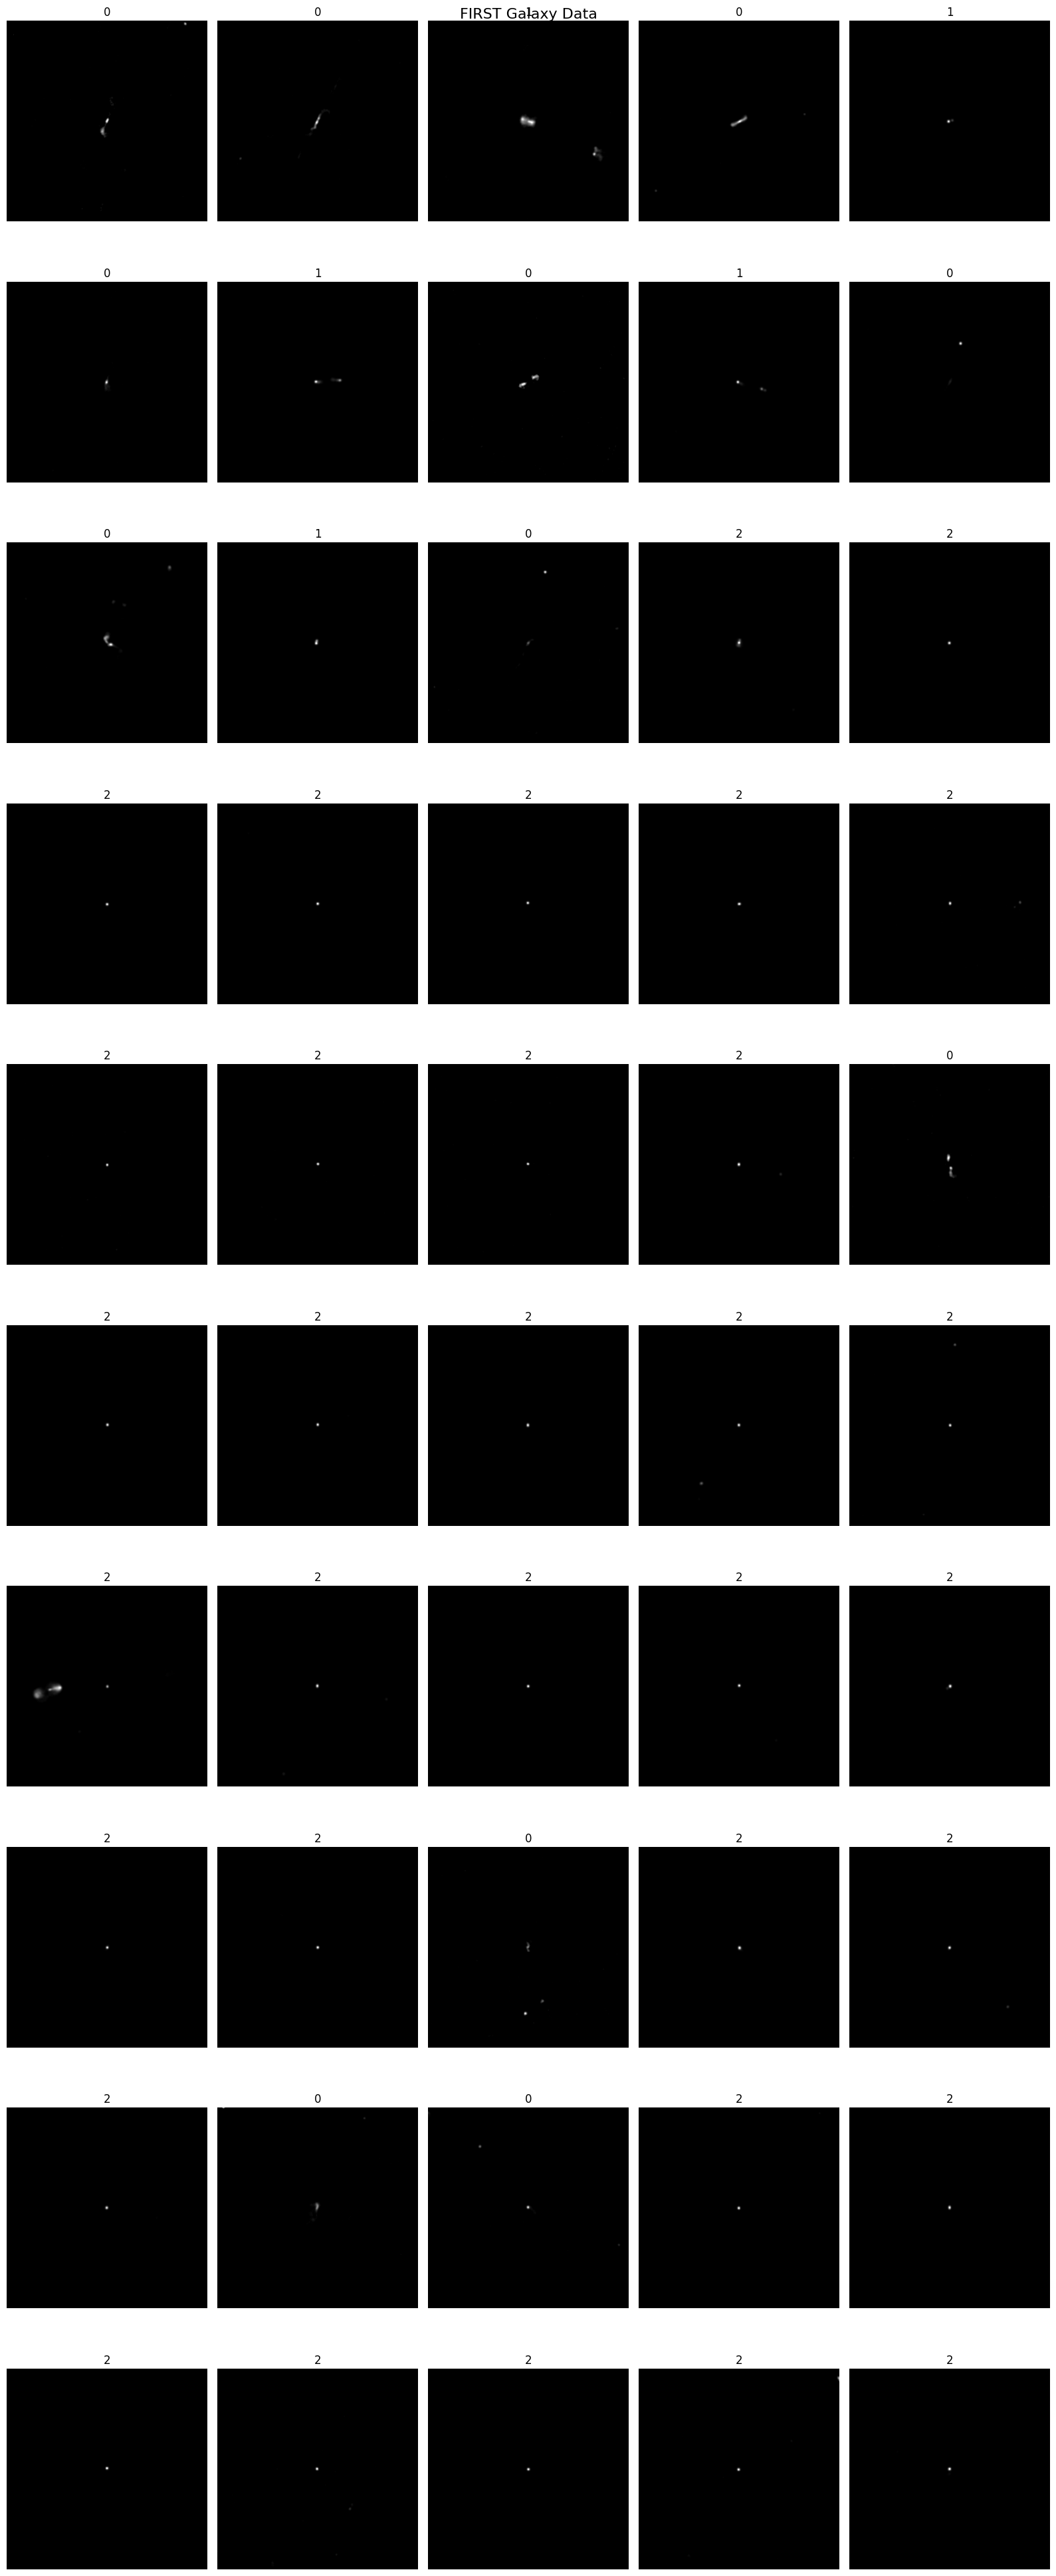

In [49]:
#plot the first 10 images
import matplotlib.pyplot as plt
import numpy as np
columns = 5
rows = 10
fig=plt.figure(figsize=(16, 8*rows//2))
plt.suptitle("FIRST Galaxy Data", fontsize=16)

for i in range(1, columns*rows +1):
    img, label = data.__getitem__(i)
    img = img / 2 + 0.5     # unnormalize
    img = img.numpy()
    img = np.transpose(img, (1, 2, 0))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap='Greens')
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

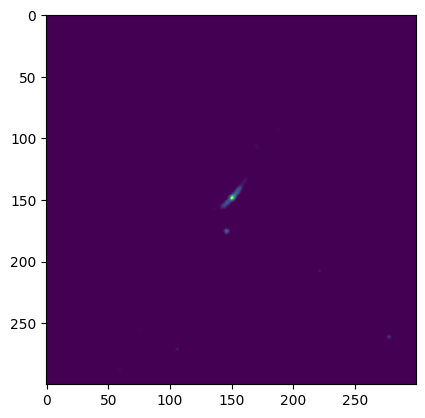

In [58]:
plt.imshow(FRI_all[0][0][0])

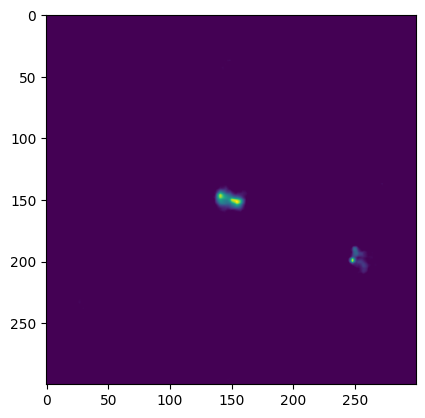

In [69]:
plt.imshow(FRII_all[0][0][0])

# Import `eta` librarie

In [59]:
!pip install ordpy wurlitzer Pillow

In [60]:
#!pip install git+https://github.com/rsautter/gpa/
!pip install git+https://github.com/barauna-lo/GPA.git

  Cloning https://github.com/barauna-lo/GPA.git to /tmp/pip-req-build-s2eov7c1
  Running command git clone --filter=blob:none --quiet https://github.com/barauna-lo/GPA.git /tmp/pip-req-build-s2eov7c1
  Resolved https://github.com/barauna-lo/GPA.git to commit 2c011bb317699305375b9847baf7a6f4509c0b4c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for GPA: filename=GPA-3.5-cp310-cp310-linux_x86_64.whl size=1514488 sha256=44a941557461d6570991e90d695fbd4aa0216b1703b94b19f6300c1bfb64a580
  Stored in directory: /tmp/pip-ephem-wheel-cache-ruc31gsc/wheels/4f/03/b6/742740ea73d4aa456120dd559208a4f8dc874802578ef46d55
Successfully built GPA


In [61]:
# !pip install wurlitzer
!git clone https://github.com/rsautter/pyJHTDB
!pip install --log log.txt pyJHTDB/.

Cloning into 'pyJHTDB'...
remote: Enumerating objects: 1459, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 1459 (delta 85), reused 125 (delta 69), pack-reused 1295
Receiving objects: 100% (1459/1459), 7.45 MiB | 10.83 MiB/s, done.
Resolving deltas: 100% (870/870), done.
Processing ./pyJHTDB
  Preparing metadata (setup.py) ... done
  Created wheel for pyJHTDB: filename=pyJHTDB-20210108.0-cp310-cp310-linux_x86_64.whl size=1108495 sha256=0502caf2b6c72b35c37bae48943e2f32d4ff7cf14ae1359350a1d3660e523262
  Stored in directory: /tmp/pip-ephem-wheel-cache-d7c4862i/wheels/a1/64/2b/e16637f3775872b61baf50737be41779834a395e02b215aeff
Successfully built pyJHTDB


In [62]:
!pip install --force-reinstal git+https://github.com/rsautter/eta/

  Cloning https://github.com/rsautter/eta/ to /tmp/pip-req-build-1f0nmkra
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/eta/ /tmp/pip-req-build-1f0nmkra
  Resolved https://github.com/rsautter/eta/ to commit 81333087bbf2fc5427b4152e20e4f444d7bc2764
  Preparing metadata (setup.py) ... done
  Created wheel for Eta: filename=Eta-0.1-py3-none-any.whl size=15117 sha256=7388df794db1eec0ba7234ca10d616bec6222242fcc4a1bf0ba55d66753786d1
  Stored in directory: /tmp/pip-ephem-wheel-cache-nuylf7tn/wheels/be/e5/6a/f34013f615a3379f8419799e352c823927e6d8decfebf50307
Successfully built Eta


In [63]:
!pip install --force-reinstall git+https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau

  Cloning https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau to /tmp/pip-req-build-ppyenmua
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau /tmp/pip-req-build-ppyenmua
  Resolved https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau to commit 98d6a3a85e19e5c0e80d41e297dec6afd4a18d69
  Preparing metadata (setup.py) ... done
  Created wheel for NCGL: filename=NCGL-0.1-py3-none-any.whl size=18850 sha256=ae425dc0fd2000b33dbd69f8e1031c5231aba894e45569d2aa676c6e05d2b411
  Stored in directory: /tmp/pip-ephem-wheel-cache-691d5hgs/wheels/bc/92/12/b3ad30c00cc629588178c0455936a8ec81bc775213bae2bb70
Successfully built NCGL


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import inset_locator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

import cv2
import NCGL
import eta
import tqdm
import pyJHTDB
from pyJHTDB.dbinfo import mhd1024, isotropic1024coarse
from pyJHTDB import libJHTDB
from ordpy import *
from GPA import GPA
import glob
from PIL import Image



In [65]:
def eta_df(cube,ranges):
  df =[]
  for i in tqdm.tqdm(range(ranges)):
    s = cube[i]
    d = eta.entropy(s)
    gpaRes = ga(s,moment=['G4'])
    d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
    df.append(d)
  return pd.DataFrame(df)

In [70]:
eta.entropy(FRII_all[0][0][0])

TypeError: std() received an invalid combination of arguments - got (ddof=int, dtype=NoneType, out=NoneType, axis=NoneType, ), but expected one of:
 * (tuple of ints dim, bool unbiased, bool keepdim)
 * (tuple of ints dim, *, Number correction, bool keepdim)
      didn't match because some of the keywords were incorrect: ddof, dtype, out, axis
 * (bool unbiased)
 * (tuple of names dim, bool unbiased, bool keepdim)
 * (tuple of names dim, *, Number correction, bool keepdim)
      didn't match because some of the keywords were incorrect: ddof, dtype, out, axis
